<a href="https://colab.research.google.com/github/rshaikh95/datasci_6_regression/blob/main/MultipleLR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
install.packages("rms")
install.packages("lmtest")

# Load libraries
library(ggplot2)
library(lmtest) # homogeneity of variances of the residuals, Breusch-Pagan test
library(rms) # Harvey-Collier test for testing linearity.


In [ ]:
data <- read.csv('/content/healthcare-dataset-stroke-data.csv')
data

Dependent Variable: Average glucose levels (avg_glucose_level)

Independent Variable: bmi, age, stroke, heart disease

In [ ]:
# Fit the regression model
model <- lm(avg_glucose_level ~ bmi + age + stroke + heart_disease, data)
summary(model)


Call:
lm(formula = avg_glucose_level ~ bmi + age + stroke + heart_disease, 
    data = data)

Residuals:
   Min     1Q Median     3Q    Max 
-92.66 -28.45 -11.87  14.00 161.44 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)   72.18975    2.39751  30.110  < 2e-16 ***
bmi            0.64141    0.08352   7.680 1.90e-14 ***
age            0.31295    0.03019  10.366  < 2e-16 ***
stroke        15.86293    2.91932   5.434 5.77e-08 ***
heart_disease 21.33597    2.79546   7.632 2.73e-14 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 43.39 on 5105 degrees of freedom
Multiple R-squared:  0.08254,	Adjusted R-squared:  0.08182 
F-statistic: 114.8 on 4 and 5105 DF,  p-value: < 2.2e-16


In [ ]:
# Calculate residuals and fitted values
residuals <- model$residuals
fitted <- model$fitted.values


In [ ]:
# CHECKING ASSUMPTIONS

# Assessing linearity of the relationship
plot(fitted, residuals)
abline(h = 0, col = "red")
title("Residuals vs Fitted Values")
plot(data$avg_glucose_level, fitted)
abline(0, 1, col = "red")
title("Observed vs Fitted Values")

In [ ]:
# Harvey-Collier test for linearity
hc_test <- harvtest(model)
print(hc_test)


Warning message in sqrt(fr):
“NaNs produced”
Warning message in sqrt(fr):
“NaNs produced”



	Harvey-Collier test

data:  model
HC = NA, df = 5104, p-value = NA




	Shapiro-Wilk normality test

data:  residuals[0:5000]
W = 0.88381, p-value < 2.2e-16


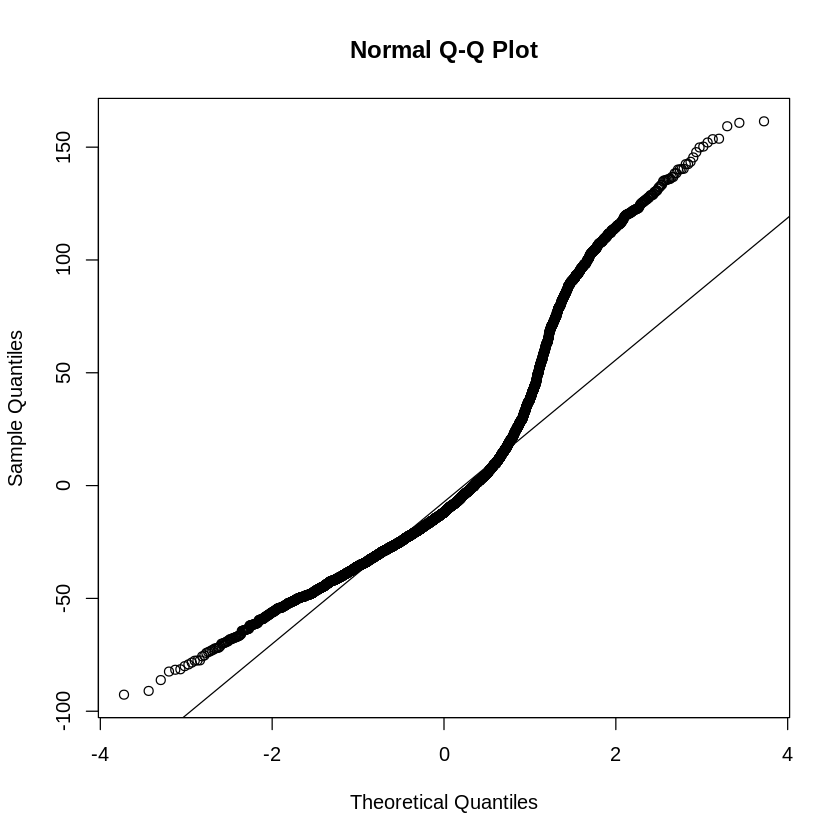

In [ ]:
# Assessing normality of residuals
shapiro.test(residuals[0:5000])
qqnorm(residuals)
qqline(residuals)


In [ ]:
# Assessing homogeneity of variance of residuals
bp_test <- bptest(model)
print(bp_test)


	studentized Breusch-Pagan test

data:  model
BP = 491.98, df = 4, p-value < 2.2e-16

